<img src="https://vip.arizona.edu/images/logoviplab.png"/>

## <center> <font color='blue'>BE/BAT 485/585</font> </center>
 In this exercise, you will:<br>
 - Read data from a BSQ file
 - then extract and plot various spectra from simulated sensors 
1. Histograms
2. Scatter Plots
3. Spectral Signature Plot

In [1]:
# load library modules 
import os
import numpy as np
import matplotlib.pyplot as plt

#Notice this is a new library with additonal functionality 
import viplab_lib2 as vip

In [8]:
# Read MODIS simulated data
MODIS_file="../Data/MODIS_NEON_GreenValley.bsq"
MODIS_nrows=17
MODIS_ncols=15
#MODIS bands: BLUE, GREEN, RED, NIR
MODIS_nbands=4 
# read all 4 bands from simulated MODIS
DataMODIS=vip.BSQ_band_read(MODIS_file,-4,MODIS_nrows,MODIS_ncols)

In [9]:
# Read Landsat simulated data
LANDSAT_file="../Data/LANDSAT_NEON_GreenValley.bsq"
LANDSAT_nrows=128
LANDSAT_ncols=153
#LANDSAT bands: BLUE, GREEN, RED, NIR, SWIR1, SWIR2
LANDSAT_nbands=6
DataLANDSAT=vip.BSQ_band_read(LANDSAT_file,-6,LANDSAT_nrows,LANDSAT_ncols)

In [12]:
# Read NEON Hyperspectral data 
NEON_file="../Data/NEON_GreenValley2.bsq"
NEON_nrows=656
NEON_ncols=3100
NEON_nbands=100 # We are only reading a subset of the hyperspectral bands 

DataNEON=vip.BSQ_band_read(NEON_file,-100,NEON_nrows,NEON_ncols)

# <font color="red">Let us learn how to set/use multiple plots/figures on a single Canvas </font>
* More info in this link https://python-course.eu/numerical-programming/creating-subplots-in-matplotlib.php

In [25]:
# Create the RGB images
NEON_RGBImage=vip.Image_getRGB(DataNEON[:,:,48],DataNEON[:,:,34],DataNEON[:,:,17],8000)
MODIS_RGBImage=vip.Image_getRGB(DataMODIS[:,:,2],DataMODIS[:,:,1],DataMODIS[:,:,0],8000)
LandSat_RGBImage=vip.Image_getRGB(DataLANDSAT[:,:,2],DataLANDSAT[:,:,1],DataLANDSAT[:,:,0],8000)

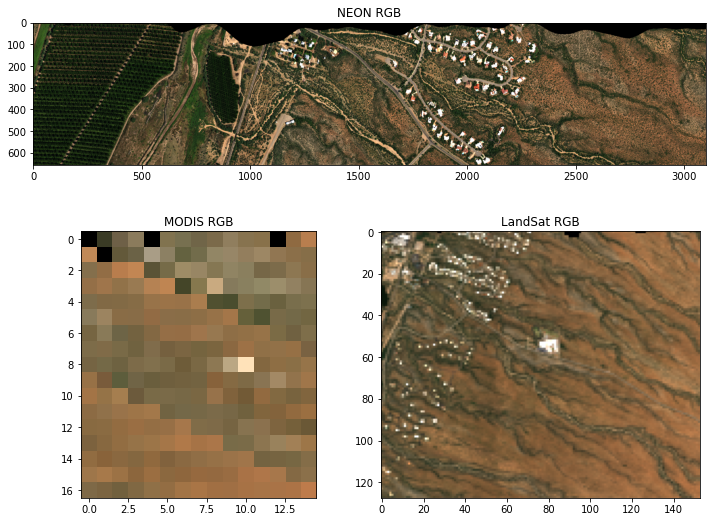

In [29]:
# Here is one way. There are many different ways
# Define a plot canvas . in this case a 2 by 2 matrix/table. Meaning two Rows and two columns of plots
import matplotlib.gridspec as gridspec

plt.figure(figsize=(10, 8))
G = gridspec.GridSpec(2, 2)

# Top row plot/image
axes_1 = plt.subplot(G[0, :])
axes_1.set_title('NEON RGB')
axes_1.imshow(NEON_RGBImage)

# Bottom left plot
axes_1 = plt.subplot(G[1, 0])
axes_1.set_title('MODIS RGB')
axes_1.imshow(MODIS_RGBImage)

# Bottom rigth plot
axes_1 = plt.subplot(G[1, 1])
axes_1.set_title('LandSat RGB')
axes_1.imshow(LandSat_RGBImage)

plt.tight_layout()
plt.show()

In [31]:
# Now extract data from all sensors and plot the data

# Get MODIS Reflectance values from each band
PixelMODIS=DataMODIS[1,4,:]
# Set MODIS wavelenght (midpoint band)
# You should know by now that these are the MODIS bands
WaveMODIS=[469,555,645,858] 

In [32]:
# Get LANDSAT Reflectance values
PixelLANDSAT=DataLANDSAT[12,38,:]
# Set LANDSAR wavelength
WaveLANDSAT=[480,560,655,865,1610,2200]


In [33]:
# Do the same for NEON 
PixelNEON=DataNEON[328,1950,:]
# Read the wavelength values from the textfile
file = open('../Data/NEON_wavelength_values2.txt', 'r') 
Xvalues= file.readlines() 
nvalues=len(Xvalues)

#convert text to number (float)
for i in range(0,nvalues):
  Xvalues[i]=float(Xvalues[i]) 

# close text file
file.close


<function TextIOWrapper.close()>

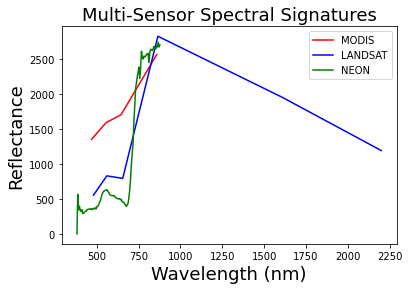

In [34]:
#Now plot all signatures 
plt.figure()
plt.title('Multi-Sensor Spectral Signatures', fontsize = 18)
plt.xlabel('Wavelength (nm)', fontsize = 18)
plt.ylabel('Reflectance', fontsize = 18)
plt.plot(WaveMODIS,PixelMODIS, color="red", label="MODIS")
plt.plot(WaveLANDSAT,PixelLANDSAT,color="blue", label="LANDSAT")
plt.plot(Xvalues,PixelNEON,color="green",label="NEON")
plt.legend(loc='upper right')

# <font color="red">Homework: To do</font>
* Extract additional example spectras from the different sensors 
* Following EX-2 extract Row/Column/Transect from the different sensors and compare them. 
* Why the differences?
* Remember this is the same scene but imaged at different spatial and spectral resolution 

In [35]:
#display a message to know the program ended
print("program ended.")

program ended.
